In [1]:
import pandas as pd
data = pd.read_csv("data/Adult.csv")

In [2]:
# Define categorical, mixed, and integer columns
categorical_columns = ["workclass", "education", "marital-status", "occupation",
                       "relationship", "race", "gender", "native-country", "income"]
mixed_columns = {"capital-gain": "positive", "capital-loss": "positive"}
integer_columns = ["age", "fnlwgt", "hours-per-week", "capital-gain", "capital-loss"]

In [21]:
from libs.indoxGen_torch.indoxGen_torch.GAN.gan import TabularGANTrainer, TabularGANConfig
from libs.indoxGen_torch.indoxGen_torch.GAN.evaluation import train_and_evaluate_classifier, evaluate_utility, evaluate_statistical_similarity, evaluate_privacy, plot_distributions, evaluate_data_drift

In [14]:
# Set up the configuration
config = TabularGANConfig(
    input_dim=200,  # Noise dimension
    generator_layers=[128, 256, 512],
    discriminator_layers=[512, 256, 128],
    learning_rate=2e-4,
    beta_1=0.5,
    beta_2=0.9,
    batch_size=128,
    epochs=1,
    n_critic=5
)

# Initialize the trainer with the config and column information
trainer = TabularGANTrainer(
    config=config,
    categorical_columns=categorical_columns,
    mixed_columns=mixed_columns,
    integer_columns=integer_columns
)

# Train the model
history = trainer.train(data, patience=15)

Epoch [1/1] - D Loss: -1.2082, G Loss: 0.3256


In [15]:
synthetic_data = trainer.generate_samples(50000)

In [16]:
synthetic_data['income'].value_counts()

income
0    39089
1    10911
Name: count, dtype: int64

In [17]:
synthetic_data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,49,4,295124,11,4,1,1,2,1,0,0,43,39,0
1,52,4,292721,11,2,12,0,4,1,0,0,28,39,0
2,48,4,84551,11,2,7,0,4,1,0,21,30,39,0
3,31,4,86479,11,4,10,1,4,1,0,28,28,39,0
4,51,4,97858,11,4,3,1,4,1,0,19,53,39,0


In [18]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0



Utility Metrics Comparison (Real vs. Synthetic):

Classifier: LOGISTICREGRESSION
Accuracy: Real = 80.45, Synthetic = 76.61, Difference = 3.84
AUC: Real = 0.82, Synthetic = 0.75, Difference = 0.07
F1 Score: Real = 0.65, Synthetic = 0.47, Difference = 0.18

Classifier: DECISIONTREE
Accuracy: Real = 81.29, Synthetic = 70.96, Difference = 10.33
AUC: Real = 0.75, Synthetic = 0.53, Difference = 0.22
F1 Score: Real = 0.75, Synthetic = 0.53, Difference = 0.22

Classifier: RANDOMFOREST
Accuracy: Real = 86.24, Synthetic = 76.71, Difference = 9.53
AUC: Real = 0.91, Synthetic = 0.72, Difference = 0.19
F1 Score: Real = 0.80, Synthetic = 0.49, Difference = 0.31

Classifier: MULTILAYERPERCEPTRON
Accuracy: Real = 83.86, Synthetic = 76.61, Difference = 7.25
AUC: Real = 0.89, Synthetic = 0.75, Difference = 0.14
F1 Score: Real = 0.76, Synthetic = 0.50, Difference = 0.26

Statistical Similarity Metrics:
Average Wasserstein Distance (Continuous Columns): 0.0445
Average Jensen-Shannon Divergence (Categoric

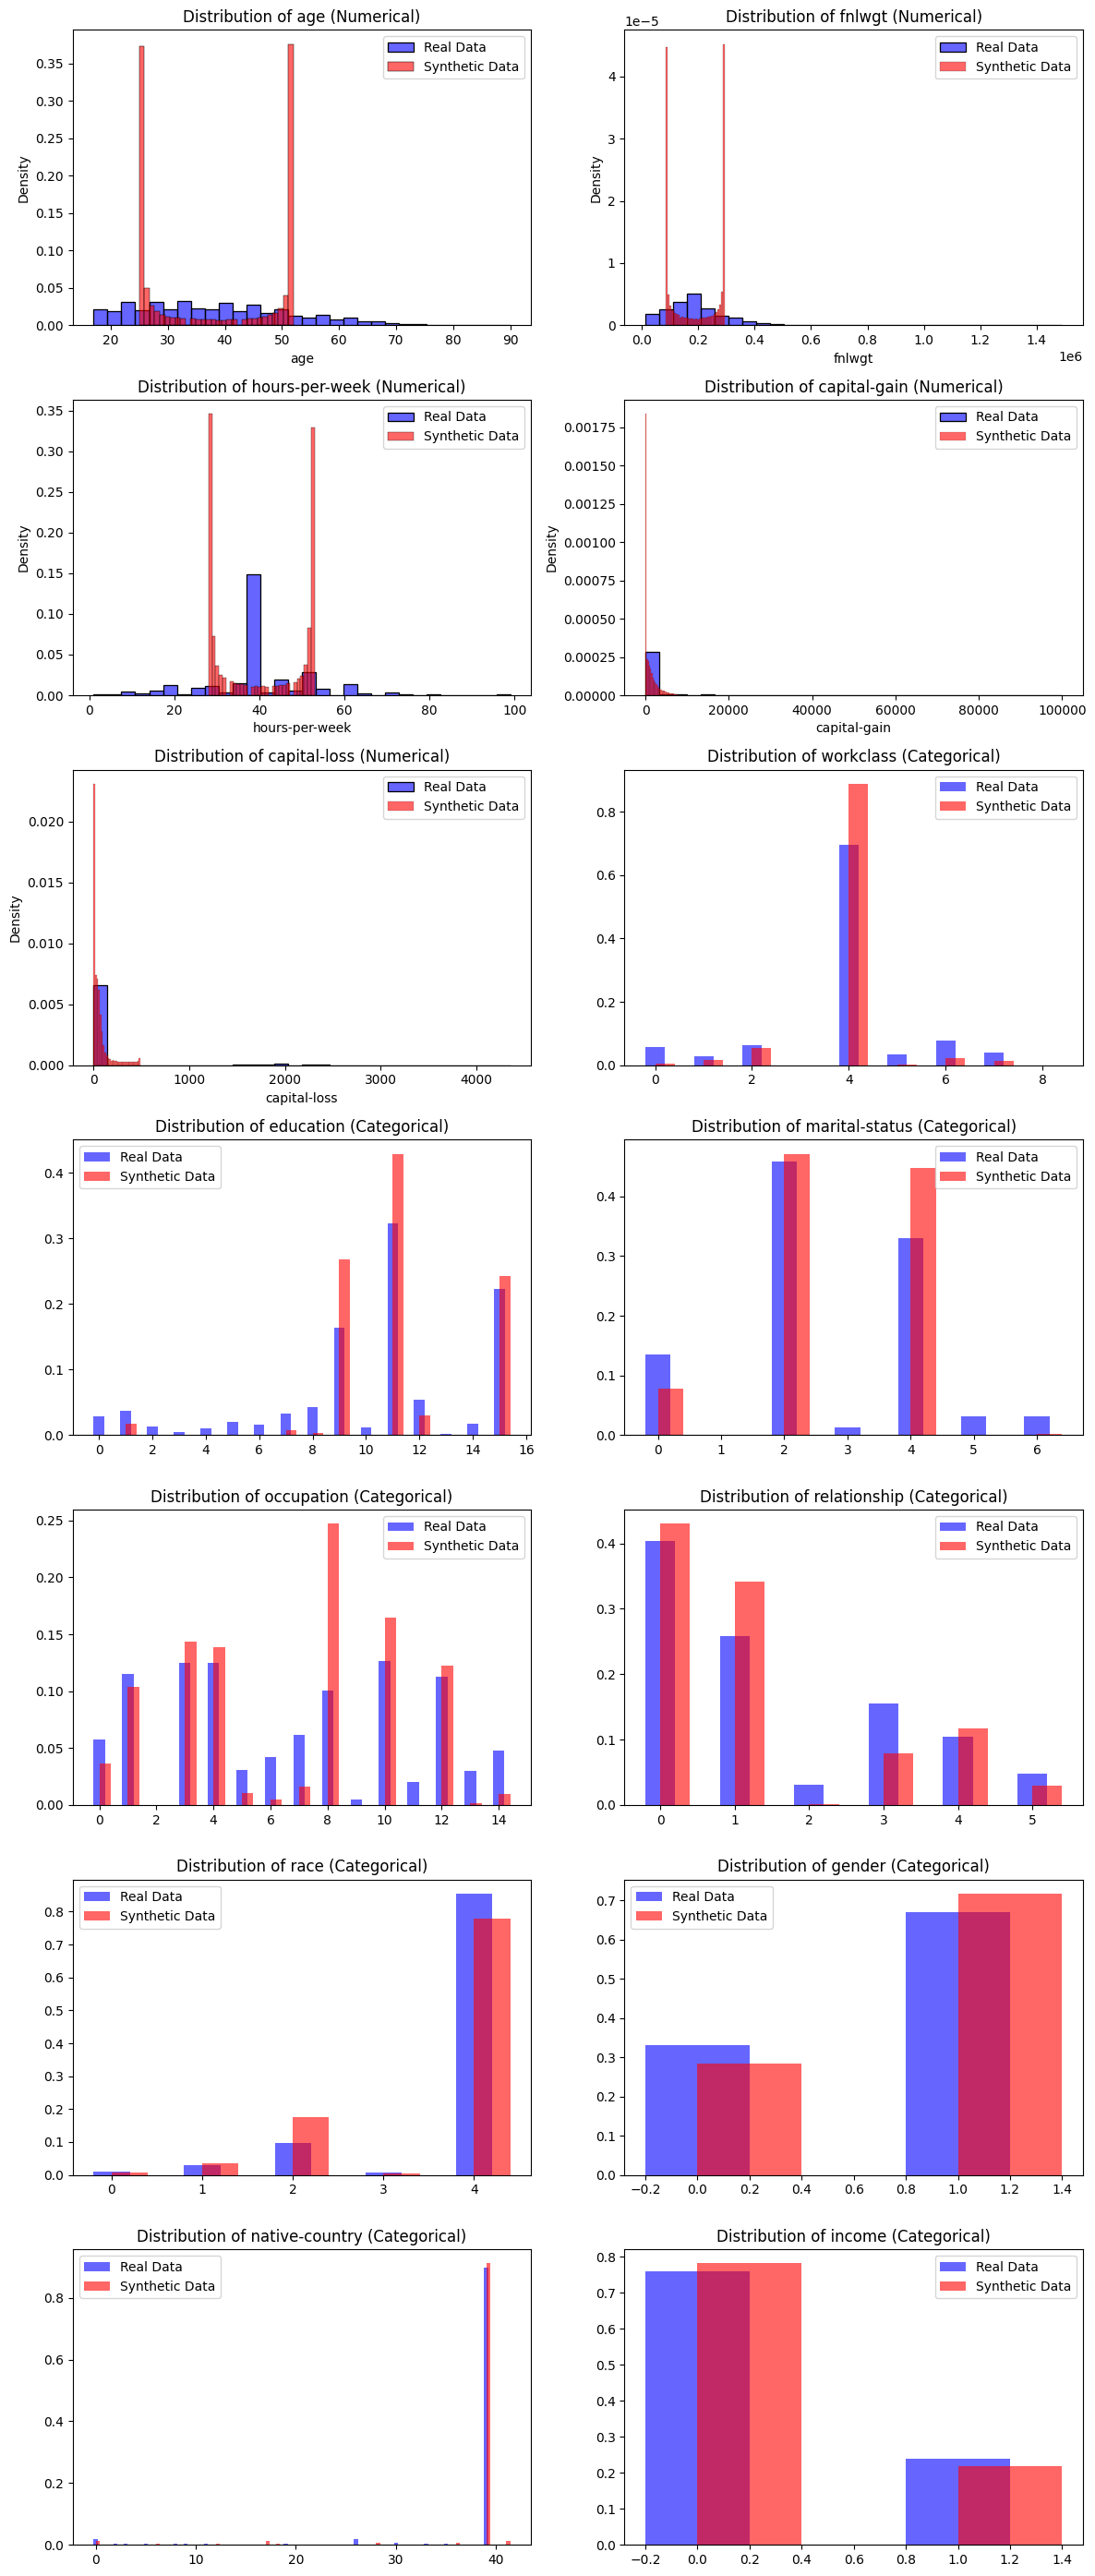

In [22]:
# 1. Evaluate Utility
evaluate_utility(data, synthetic_data, classifiers=["LogisticRegression", "DecisionTree", "RandomForest", "MultiLayerPerceptron"])

# 2. Evaluate Statistical Similarity
evaluate_statistical_similarity(data, synthetic_data, cat_cols=categorical_columns)

# 3. Evaluate Privacy
evaluate_privacy(data, synthetic_data)

# 4. Evaluate Data Drift
drift_results = evaluate_data_drift(data, synthetic_data, categorical_columns, integer_columns)
print(drift_results)

# 5. Visualize Distributions
plot_distributions(data, synthetic_data, categorical_columns, integer_columns)
